Indices of (near) zero-energy eigenstates: [199 200]


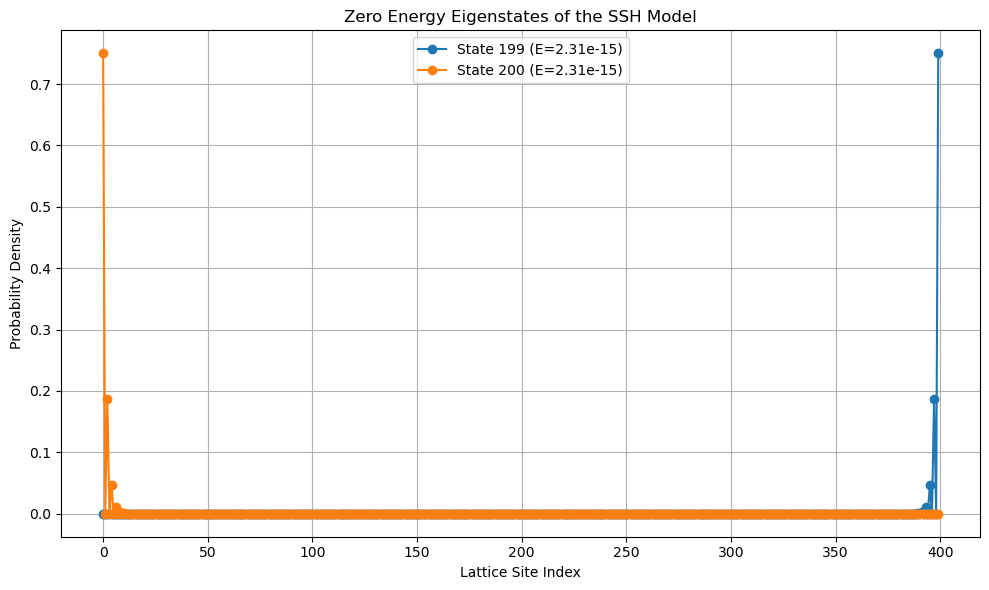

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian(N, v, w):
    """
    Construct the SSH Hamiltonian for an open chain of N unit cells (2N sites)
    with intra-cell hopping v and inter-cell hopping w.
    
    The Hamiltonian is given by:
        H = sum_{i=0}^{N-1} [ v (c†_{A,i} c_{B,i} + h.c.) + 
                              w (c†_{B,i} c_{A,i+1} + h.c.) ]
    where each unit cell i has two sites: A (at index 2*i) and B (at index 2*i+1).
    
    Parameters:
        N (int): Number of unit cells (total sites = 2*N).
        v (float): Intra-cell hopping amplitude.
        w (float): Inter-cell hopping amplitude.
    
    Returns:
        H (ndarray): A (2N x 2N) Hamiltonian matrix.
    """
    L = 2 * N  # total number of sites
    H = np.zeros((L, L))
    
    for i in range(N):
        a = 2 * i      # site A in cell i
        b = 2 * i + 1  # site B in cell i
        
        # Intra-cell coupling
        H[a, b] = v
        H[b, a] = v
        
        # Inter-cell coupling: from B in cell i to A in cell i+1 (if it exists)
        if i < N - 1:
            H[b, 2*(i+1)] = w
            H[2*(i+1), b] = w
    return H

def plot_zero_energy_eigenstates(N, v, w, tol=1e-4):
    """
    Diagonalize the SSH Hamiltonian and plot the probability density of the 
    eigenstates with eigenvalues within a tolerance of zero.
    
    Parameters:
        N (int): Number of unit cells.
        v (float): Intra-cell hopping amplitude.
        w (float): Inter-cell hopping amplitude.
        tol (float): Tolerance for considering an eigenvalue as zero.
    """
    # Construct the Hamiltonian
    H = ssh_hamiltonian(N, v, w)
    
    # Diagonalize H (using eigh since H is real symmetric)
    eigvals, eigvecs = np.linalg.eigh(H)
    
    # Identify eigenstates with eigenvalue near zero
    zero_indices = np.where(np.abs(eigvals) < tol)[0]
    if len(zero_indices) == 0:
        print("No zero-energy eigenstates found within the tolerance.")
        return
    print("Indices of (near) zero-energy eigenstates:", zero_indices)
    
    # Create an x-axis corresponding to the lattice sites
    L = 2 * N
    sites = np.arange(L)
    
    # Plot the probability density (|psi|^2) for each zero-energy eigenstate
    plt.figure(figsize=(10, 6))
    for idx in zero_indices:
        psi = eigvecs[:, idx]
        prob_density = np.abs(psi)**2
        plt.plot(sites, prob_density, marker='o', linestyle='-',
                 label=f"State {idx} (E={eigvals[idx]:.2e})")
    
    plt.xlabel("Lattice Site Index")
    plt.ylabel("Probability Density")
    plt.title("Zero Energy Eigenstates of the SSH Model")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Model parameters
    N = 200       # number of unit cells (total sites = 2*N)
    v = 1.0      # intra-cell hopping amplitude
    w = 2.0      # inter-cell hopping amplitude (choose w > v for edge states)
    
    plot_zero_energy_eigenstates(N, v, w)


Indices of zero-energy eigenstates: [17 18]
Eigenvalues: [-5.7220459e-06  5.7220459e-06]


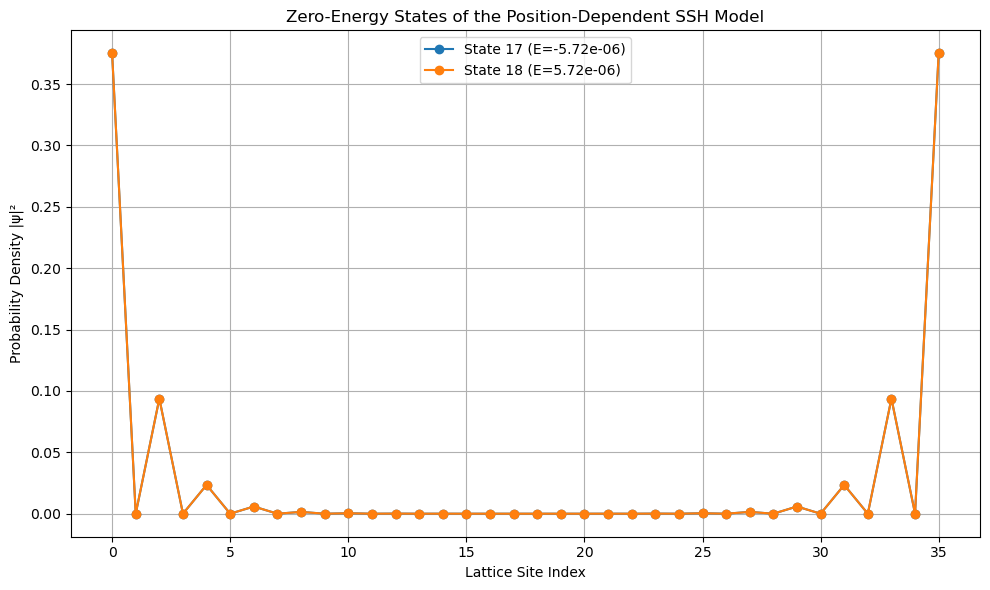

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma):
    """
    Constructs the SSH Hamiltonian for an open chain with N unit cells (2N sites)
    and position-dependent hopping amplitudes:
    
      Intra-cell hopping:
        t1(n) = t1_0 * ((2*n - 1)/(N - 1))**sigma,    for n = 1, 2, ..., N
        
      Inter-cell hopping:
        t2(n) = t2_0 * ((2*n)/(N - 1))**sigma,          for n = 1, 2, ..., N-1
    
    The Hamiltonian is written in the basis:
      [a_1, b_1, a_2, b_2, ..., a_N, b_N]
    """
    L = 2 * N  # total number of sites
    H = np.zeros((L, L))
    
    # Intra-cell hoppings: couple a_n (index 2n-2) to b_n (index 2n-1)
    for n in range(1, N+1):
        t1_n = t1_0 * (((2 * n - 1) / (N - 1)) ** sigma)
        i_a = 2 * n - 2  # a_n index in Python (0-indexed)
        i_b = 2 * n - 1  # b_n index
        H[i_a, i_b] = t1_n
        H[i_b, i_a] = t1_n
        
    # Inter-cell hoppings: couple b_n (index 2n-1) to a_{n+1} (index 2n)
    for n in range(1, N):
        t2_n = t2_0 * (((2 * n) / (N - 1)) ** sigma)
        i_b = 2 * n - 1      # b_n index
        i_ap1 = 2 * n        # a_{n+1} index
        H[i_b, i_ap1] = t2_n
        H[i_ap1, i_b] = t2_n
    
    return H

def plot_zero_energy_states(N, t1_0, t2_0, sigma, tol=1e-4):
    """
    Diagonalizes the Hamiltonian with position-dependent hoppings,
    identifies the (nearly) zero-energy eigenstates, and plots their
    probability density (|psi|^2) as a function of the lattice site index.
    
    Parameters:
      N      : Number of unit cells.
      t1_0   : Base intra-cell hopping amplitude.
      t2_0   : Base inter-cell hopping amplitude.
      sigma  : Exponent controlling the position dependence.
      tol    : Tolerance for selecting eigenvalues near zero.
    """
    # Construct the Hamiltonian
    H = ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma)
    
    # Diagonalize the Hamiltonian (symmetric matrix)
    eigvals, eigvecs = np.linalg.eigh(H)
    
    # Identify indices of eigenvalues whose absolute value is below tolerance
    zero_mode_indices = np.where(np.abs(eigvals) < tol)[0]
    
    if zero_mode_indices.size == 0:
        print("No zero-energy eigenstates found within the tolerance.")
        return
    else:
        print("Indices of zero-energy eigenstates:", zero_mode_indices)
        print("Eigenvalues:", eigvals[zero_mode_indices])
    
    L = 2 * N
    sites = np.arange(L)
    
    # Plot the probability density for each zero-energy eigenstate
    plt.figure(figsize=(10, 6))
    for idx in zero_mode_indices:
        psi = eigvecs[:, idx]
        prob_density = np.abs(psi)**2
        plt.plot(sites, prob_density, marker='o', linestyle='-',
                 label=f"State {idx} (E={eigvals[idx]:.2e})")
    
    plt.xlabel("Lattice Site Index")
    plt.ylabel("Probability Density |ψ|²")
    plt.title("Zero-Energy States of the Position-Dependent SSH Model")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Model parameters
    N = 18         # Number of unit cells (total sites = 2N)
    t1_0 = 1.0     # Base intra-cell hopping amplitude
    t2_0 = 2.0     # Base inter-cell hopping amplitude
    sigma = 0    # Exponent for position dependence
    
    # Plot the zero-energy states (probability density)
    plot_zero_energy_states(N, t1_0, t2_0, sigma)


Numerical zero mode energy: 2.31e-15


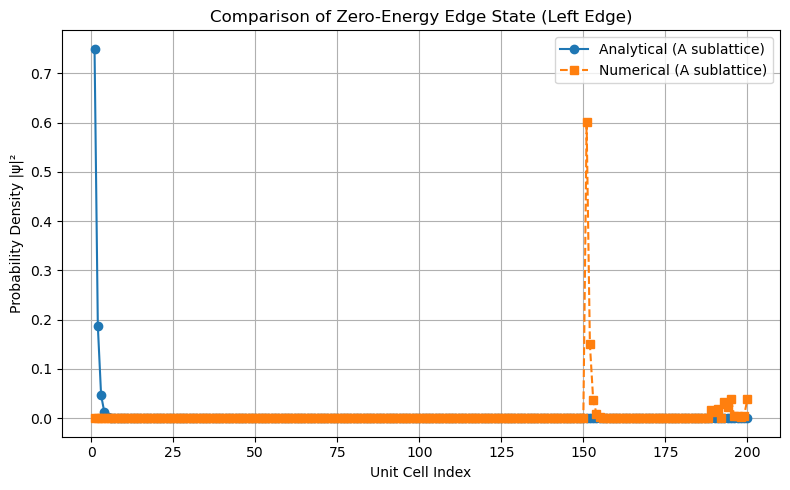

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma):
    """
    Constructs the 2N x 2N Hamiltonian matrix for the modified SSH model
    with position-dependent hoppings:
      t1(n) = t1_0*((2n-1)/(N-1))**sigma,   n = 1,...,N  (intra-cell)
      t2(n) = t2_0*((2n)/(N-1))**sigma,       n = 1,...,N-1 (inter-cell)
    The basis ordering is: [a1, b1, a2, b2, ..., aN, bN].
    """
    L = 2 * N
    H = np.zeros((L, L))
    # Intra-cell hoppings
    for n in range(1, N+1):
        t1 = t1_0 * (((2*n - 1)/(N - 1))**sigma)
        i_a = 2*(n-1)       # index for a_n (0-indexed)
        i_b = 2*(n-1) + 1   # index for b_n
        H[i_a, i_b] = t1
        H[i_b, i_a] = t1
    # Inter-cell hoppings
    for n in range(1, N):
        t2 = t2_0 * (((2*n)/(N - 1))**sigma)
        i_b = 2*(n-1) + 1   # index for b_n
        i_ap1 = 2*n         # index for a_{n+1}
        H[i_b, i_ap1] = t2
        H[i_ap1, i_b] = t2
    return H

def analytic_edge_state_A(N, t1_0, t2_0, sigma):
    """
    Computes the analytical left-edge state (assumed to reside solely on the A sublattice)
    for a semi-infinite chain. For a finite chain this is only an approximation.
    The recurrence relation is:
      ψ_A(1) = C (an arbitrary constant),
      ψ_A(n+1) = - (t1_0/t2_0)*((2n-1)/(2n))**sigma * ψ_A(n),  for n = 1,..., N-1.
    Returns an array of length N with the amplitudes on the A sites (cells 1,...,N)
    normalized so that sum(|ψ_A(n)|^2)=1.
    """
    psi = np.zeros(N)
    psi[0] = 1.0  # choose an arbitrary normalization
    for n in range(1, N):
        factor = -(t1_0/t2_0)*((2*n - 1)/(2*n))**sigma
        psi[n] = psi[n-1]*factor
    # Normalize the wavefunction
    norm = np.sqrt(np.sum(np.abs(psi)**2))
    return psi / norm

def numerical_zero_mode_A(N, t1_0, t2_0, sigma):
    """
    Constructs the full Hamiltonian, diagonalizes it, and extracts the eigenstate
    whose eigenvalue is closest to zero. Returns the A-sublattice components of the
    normalized eigenstate (i.e. components at indices 0, 2, 4, ..., 2N-2) and its eigenvalue.
    """
    H = ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma)
    eigvals, eigvecs = np.linalg.eigh(H)
    # Find the eigenstate with eigenvalue closest to zero
    idx = np.argmin(np.abs(eigvals))
    psi_full = eigvecs[:, idx]
    # Extract A sublattice components (even indices)
    psi_A = psi_full[0::2]
    norm = np.sqrt(np.sum(np.abs(psi_A)**2))
    return psi_A / norm, eigvals[idx]

if __name__ == "__main__":
    # Model parameters
    N = 200         # number of unit cells
    t1_0 = 1.0     # base intra-cell hopping
    t2_0 = 2.0     # base inter-cell hopping (topological phase when t2_0 > t1_0)
    sigma = 0    # exponent for position dependence

    # Compute the analytical edge state (A sublattice only)
    psi_analytic = analytic_edge_state_A(N, t1_0, t2_0, sigma)
    
    # Compute the numerical zero mode (extract the A sublattice part)
    psi_numerical, E_num = numerical_zero_mode_A(N, t1_0, t2_0, sigma)
    
    print(f"Numerical zero mode energy: {E_num:.2e}")
    
    # Define unit cell indices for plotting
    cells = np.arange(1, N+1)
    
    # Plot the probability densities |ψ|^2 on the A sublattice
    plt.figure(figsize=(8, 5))
    plt.plot(cells, np.abs(psi_analytic)**2, 'o-', label="Analytical (A sublattice)")
    plt.plot(cells, np.abs(psi_numerical)**2, 's--', label="Numerical (A sublattice)")
    plt.xlabel("Unit Cell Index")
    plt.ylabel("Probability Density |ψ|²")
    plt.title("Comparison of Zero-Energy Edge State (Left Edge)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Numerical zero mode energies (approx.): Left: 3.88e-16, Right: 4.13e-16


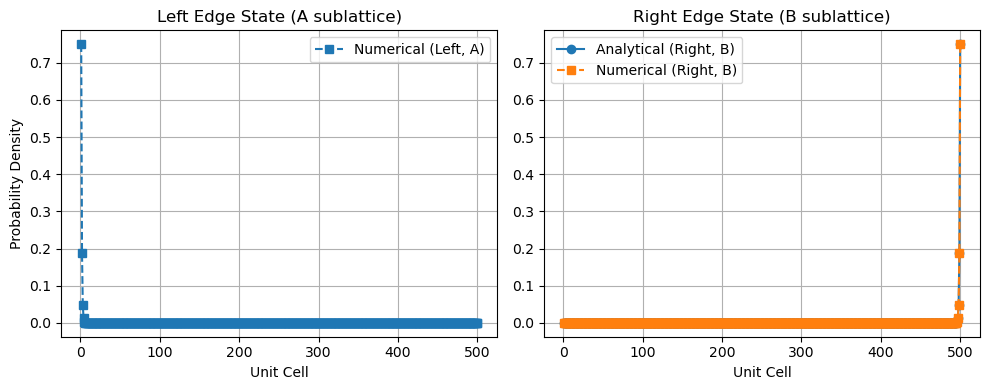

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma):
    """
    Constructs the 2N x 2N Hamiltonian for the SSH model with position-dependent hoppings:
      t1(n) = t1_0 * ((2n-1)/(N-1))**sigma,   for n = 1,...,N (intra-cell)
      t2(n) = t2_0 * ((2n)/(N-1))**sigma,       for n = 1,...,N-1 (inter-cell)
    The basis ordering is: [a1, b1, a2, b2, ..., aN, bN].
    """
    L = 2 * N
    H = np.zeros((L, L))
    
    # Intra-cell hoppings: couple a_n (index 2n-2) with b_n (index 2n-1)
    for n in range(1, N+1):
        t1 = t1_0 * (((2*n - 1)/(N - 1))**sigma)
        i_a = 2*(n-1)
        i_b = 2*(n-1) + 1
        H[i_a, i_b] = t1
        H[i_b, i_a] = t1
        
    # Inter-cell hoppings: couple b_n (index 2n-1) with a_(n+1) (index 2n)
    for n in range(1, N):
        t2 = t2_0 * (((2*n)/(N - 1))**sigma)
        i_b = 2*(n-1) + 1
        i_ap1 = 2*n
        H[i_b, i_ap1] = t2
        H[i_ap1, i_b] = t2
    
    return H

def analytic_left_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical amplitude on the A sublattice for the left-edge zero mode,
    given by:
      ψ_A(1) = C_L,  and for n>=2,
      ψ_A(n) = C_L * ∏_{m=1}^{n-1} [ - (t1_0/t2_0)*((2m-1)/(2m))**sigma ]
    Returns an array of length N (cells 1...N).
    """
    psi = np.zeros(N, dtype=float)
    psi[0] = 1.0  # arbitrary constant; normalization applied later
    for n in range(1, N):
        factor = - (t1_0/t2_0) * (((2*n - 1)/(2*n))**sigma)
        psi[n] = psi[n-1] * factor
    # Normalize
    norm = np.sqrt(np.sum(np.abs(psi)**2))
    psi /= norm
    return psi

def analytic_right_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical amplitude on the B sublattice for the right-edge zero mode.
    Here we use the recurrence coming from the A-site equations.
    Start at cell N (right edge): ψ_B(N)=C_R, and for n = N-1,...,1,
      ψ_B(n) = - (t1_0/t2_0) * [((2(n+1)-1)/(2n))**sigma] * ψ_B(n+1)
    Returns an array of length N (cells 1...N), where the index corresponds to cell number.
    """
    psi = np.zeros(N, dtype=float)
    psi[-1] = 1.0  # set amplitude at the right edge (cell N)
    for n in range(N-2, -1, -1):
        # For cell n+1 (using 1-indexing, n+1) we have:
        # factor = - (t1_0/t2_0)*(((2*(n+1)+1)/(2*(n+1)))**sigma)
        factor = - (t1_0/t2_0) * ((((2*(n+1) + 1))/(2*(n+1)))**sigma)
        psi[n] = psi[n+1] * factor
    # Normalize the state
    norm = np.sqrt(np.sum(np.abs(psi)**2))
    psi /= norm
    return psi

def numerical_edge_states(N, t1_0, t2_0, sigma, tol=1e-4):
    """
    Diagonalizes the full Hamiltonian and identifies the two eigenstates with eigenvalues
    closest to zero. Then, by comparing the weight on the A (even indices) vs. B (odd indices)
    sublattices, it assigns one state as the left-edge mode (predominantly A) and the other as
    the right-edge mode (predominantly B).
    
    Returns:
      psi_left: amplitude on the A sublattice (cells 1...N) of the left-edge state.
      psi_right: amplitude on the B sublattice (cells 1...N) of the right-edge state.
      energies: the corresponding eigenvalues.
    """
    H = ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma)
    eigvals, eigvecs = np.linalg.eigh(H)
    
    # Identify indices for eigenvalues with |E| < tol.
    idxs = np.where(np.abs(eigvals) < tol)[0]
    if idxs.size < 2:
        print("Warning: less than two zero-energy eigenstates found.")
        return None, None, None

    # Among the near-zero modes, decide which is left and which is right by checking
    # the norm on the A sublattice (even indices) vs. the B sublattice (odd indices).
    modes = []
    for idx in idxs:
        psi_full = eigvecs[:, idx]
        psi_A = psi_full[0::2]  # even indices: A sublattice
        psi_B = psi_full[1::2]  # odd indices: B sublattice
        weight_A = np.sum(np.abs(psi_A)**2)
        weight_B = np.sum(np.abs(psi_B)**2)
        modes.append((idx, weight_A, weight_B, psi_A, psi_B))
    
    # Choose the state with larger weight on A as left-edge and larger on B as right-edge.
    left_mode = max(modes, key=lambda x: x[1])
    right_mode = max(modes, key=lambda x: x[2])
    
    # Normalize the extracted sublattice components (over the cells)
    psi_left = left_mode[3] / np.sqrt(np.sum(np.abs(left_mode[3])**2))
    psi_right = right_mode[4] / np.sqrt(np.sum(np.abs(right_mode[4])**2))
    
    return psi_left, psi_right, (eigvals[left_mode[0]], eigvals[right_mode[0]])

if __name__ == "__main__":
    # Model parameters
    N = 500          # number of unit cells
    t1_0 = 1.0      # base intra-cell hopping
    t2_0 = 2.0      # base inter-cell hopping (choose t2_0 > t1_0 for a topological phase)
    sigma = 0     # exponent for position dependence
    
    # Compute analytical edge states:
    psi_left_analytic = analytic_left_edge_state(N, t1_0, t2_0, sigma)
    psi_right_analytic = analytic_right_edge_state(N, t1_0, t2_0, sigma)
    
    # Compute numerical zero modes and extract edge states:
    psi_left_num, psi_right_num, energies = numerical_edge_states(N, t1_0, t2_0, sigma)
    if energies is None:
        exit()
    
    print(f"Numerical zero mode energies (approx.): Left: {energies[0]:.2e}, Right: {energies[1]:.2e}")
    
    # Prepare cell indices for plotting (cells 1 to N)
    cells = np.arange(1, N+1)
    
    # Plot probability densities (|ψ|^2) for the left-edge state (A sublattice)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    #plt.plot(cells, np.abs(psi_left_analytic)**2, 'o-', label="Analytical (Left, A)")
    plt.plot(cells, np.abs(psi_left_num)**2, 's--', label="Numerical (Left, A)")
    plt.xlabel("Unit Cell")
    plt.ylabel("Probability Density")
    plt.title("Left Edge State (A sublattice)")
    plt.legend()
    plt.grid(True)
    
    # Plot probability densities for the right-edge state (B sublattice)
    plt.subplot(1, 2, 2)
    plt.plot(cells, np.abs(psi_right_analytic)**2, 'o-', label="Analytical (Right, B)")
    plt.plot(cells, np.abs(psi_right_num)**2, 's--', label="Numerical (Right, B)")
    plt.xlabel("Unit Cell")
    plt.title("Right Edge State (B sublattice)")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


Numerical zero mode energies (approx.): Left: 1.63e-18, Right: -1.33e-15


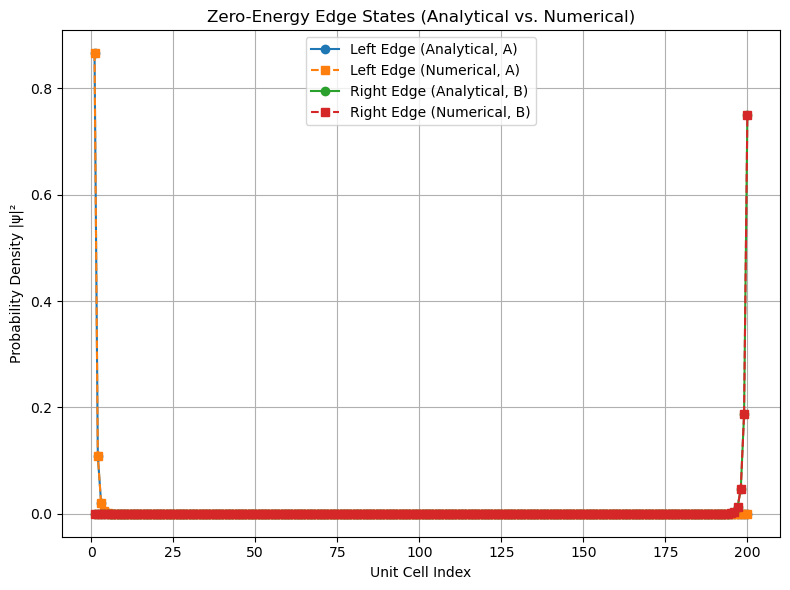

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma):
    """
    Constructs the 2N x 2N Hamiltonian for the SSH model with position-dependent hoppings:
      t1(n) = t1_0 * ((2n-1)/(N-1))**sigma,   for n = 1,...,N (intra-cell)
      t2(n) = t2_0 * ((2n)/(N-1))**sigma,       for n = 1,...,N-1 (inter-cell)
    The basis ordering is: [a1, b1, a2, b2, ..., aN, bN].
    """
    L = 2 * N
    H = np.zeros((L, L))
    
    # Intra-cell hoppings: couple a_n (index 2n-2) with b_n (index 2n-1)
    for n in range(1, N+1):
        t1 = t1_0 * (((2*n - 1) / (N - 1)) ** sigma)
        i_a = 2*(n-1)
        i_b = 2*(n-1) + 1
        H[i_a, i_b] = t1
        H[i_b, i_a] = t1
        
    # Inter-cell hoppings: couple b_n (index 2n-1) with a_{n+1} (index 2n)
    for n in range(1, N):
        t2 = t2_0 * (((2*n) / (N - 1)) ** sigma)
        i_b = 2*(n-1) + 1
        i_ap1 = 2*n
        H[i_b, i_ap1] = t2
        H[i_ap1, i_b] = t2
    
    return H

def analytic_left_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical amplitude on the A sublattice for the left-edge zero mode,
    given by:
      ψ_A(1) = C_L, and for n>=2,
      ψ_A(n) = C_L * ∏_{m=1}^{n-1} [ - (t1_0/t2_0)*((2m-1)/(2m))**sigma ]
    Returns an array of length N (cells 1...N). The state is normalized.
    """
    psi = np.zeros(N, dtype=float)
    psi[0] = 1.0  # arbitrary constant; normalization applied later
    for n in range(1, N):
        factor = - (t1_0 / t2_0) * (((2*n - 1) / (2*n)) ** sigma)
        psi[n] = psi[n-1] * factor
    # Normalize the state
    norm = np.sqrt(np.sum(np.abs(psi) ** 2))
    psi /= norm
    return psi

def analytic_right_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical amplitude on the B sublattice for the right-edge zero mode.
    Here we assume the state lives only on the B sublattice.
    Start at cell N (right edge): ψ_B(N)=C_R, and for n = N-1,...,1,
      ψ_B(n) = - (t1_0/t2_0) * [((2(n+1)-1)/(2n))**sigma] * ψ_B(n+1)
    Returns an array of length N (cells 1...N). The state is normalized.
    """
    psi = np.zeros(N, dtype=float)
    psi[-1] = 1.0  # set amplitude at the right edge (cell N)
    for n in range(N-2, -1, -1):
        factor = - (t1_0 / t2_0) * ((((2*(n+1) + 1)) / (2*(n+1))) ** sigma)
        psi[n] = psi[n+1] * factor
    # Normalize the state
    norm = np.sqrt(np.sum(np.abs(psi) ** 2))
    psi /= norm
    return psi

def numerical_edge_states(N, t1_0, t2_0, sigma, tol=1e-4):
    """
    Diagonalizes the full Hamiltonian and identifies the two eigenstates with eigenvalues
    closest to zero. Then, by comparing the weight on the A (even indices) vs. B (odd indices)
    sublattices, it assigns one state as the left-edge mode (predominantly A) and the other as
    the right-edge mode (predominantly B).
    
    Returns:
      psi_left: amplitude on the A sublattice (cells 1...N) of the left-edge state.
      psi_right: amplitude on the B sublattice (cells 1...N) of the right-edge state.
      energies: the corresponding eigenvalues.
    """
    H = ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma)
    eigvals, eigvecs = np.linalg.eigh(H)
    
    # Identify indices for eigenvalues with |E| < tol.
    idxs = np.where(np.abs(eigvals) < tol)[0]
    if idxs.size < 2:
        print("Warning: less than two zero-energy eigenstates found.")
        return None, None, None

    modes = []
    for idx in idxs:
        psi_full = eigvecs[:, idx]
        psi_A = psi_full[0::2]  # even indices: A sublattice
        psi_B = psi_full[1::2]  # odd indices: B sublattice
        weight_A = np.sum(np.abs(psi_A)**2)
        weight_B = np.sum(np.abs(psi_B)**2)
        modes.append((idx, weight_A, weight_B, psi_A, psi_B))
    
    # Choose the state with larger weight on A as left-edge and larger on B as right-edge.
    left_mode = max(modes, key=lambda x: x[1])
    right_mode = max(modes, key=lambda x: x[2])
    
    # Normalize the extracted sublattice components
    psi_left = left_mode[3] / np.sqrt(np.sum(np.abs(left_mode[3])**2))
    psi_right = right_mode[4] / np.sqrt(np.sum(np.abs(right_mode[4])**2))
    
    return psi_left, psi_right, (eigvals[left_mode[0]], eigvals[right_mode[0]])

if __name__ == "__main__":
    # Model parameters
    N = 200          # number of unit cells
    t1_0 = 1.0      # base intra-cell hopping
    t2_0 = 2.0      # base inter-cell hopping (t2_0 > t1_0 for the topological phase)
    sigma = 0.5     # exponent for position dependence
    
    # Compute analytical edge states:
    psi_left_analytic = analytic_left_edge_state(N, t1_0, t2_0, sigma)
    psi_right_analytic = analytic_right_edge_state(N, t1_0, t2_0, sigma)
    
    # Compute numerical zero modes and extract edge states:
    psi_left_num, psi_right_num, energies = numerical_edge_states(N, t1_0, t2_0, sigma)
    if energies is None:
        exit()
    
    print(f"Numerical zero mode energies (approx.): Left: {energies[0]:.2e}, Right: {energies[1]:.2e}")
    
    # Cell indices (each unit cell is indexed from 1 to N)
    cells = np.arange(1, N+1)
    
    # Plot both edge states (analytical and numerical) in one graph
    plt.figure(figsize=(8, 6))
    plt.plot(cells, np.abs(psi_left_analytic)**2, 'o-', label="Left Edge (Analytical, A)")
    plt.plot(cells, np.abs(psi_left_num)**2, 's--', label="Left Edge (Numerical, A)")
    plt.plot(cells, np.abs(psi_right_analytic)**2, 'o-', label="Right Edge (Analytical, B)")
    plt.plot(cells, np.abs(psi_right_num)**2, 's--', label="Right Edge (Numerical, B)")
    
    plt.xlabel("Unit Cell Index")
    plt.ylabel("Probability Density |ψ|²")
    plt.title("Zero-Energy Edge States (Analytical vs. Numerical)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
